Uploading the data


In [1]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv.zip to netflix_titles.csv.zip


In [2]:
import pandas as pd


df = pd.read_csv('netflix_titles.csv.zip')


df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data exploration

In [5]:
print(df.shape)
print(df.dtypes)
df.describe(include='all')


(8807, 12)
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [13]:
df = df.dropna(subset=['title'])

df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)


df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['rating'].fillna('Unknown', inplace=True)

df['listed_in'].fillna('Unknown', inplace=True)



df

/tmp/ipython-input-13-2244343638.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-13-2244343638.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Count of Movies vs TV Shows

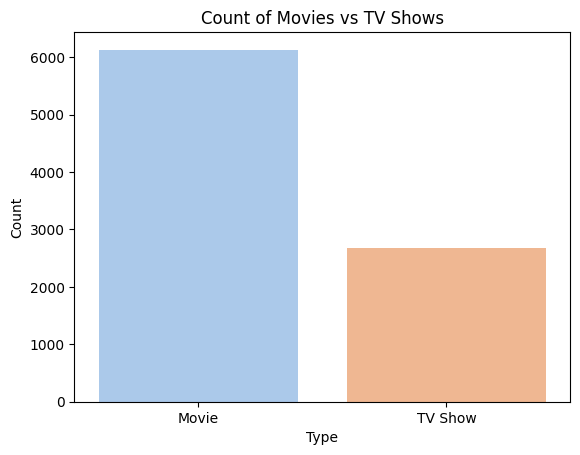

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='type', palette='pastel')
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


This suggests the platform favors one-time viewing content over episodic formats, likely to appeal to broader audiences.

Top 10 Countries by Content

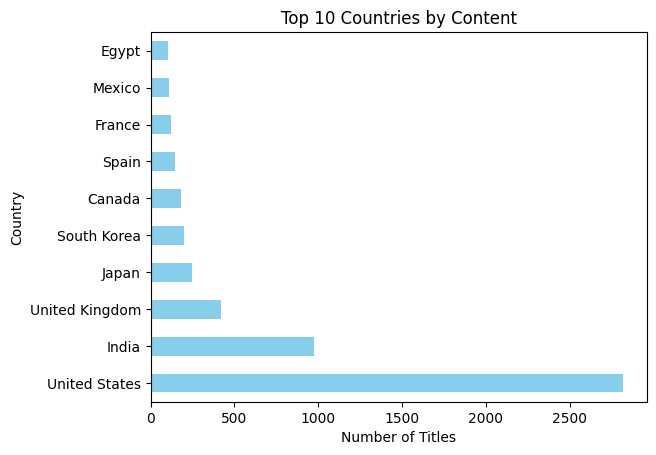

In [15]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries by Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


- The **USA** dominates Netflix content, followed by **India** and **UK**.
- This reflects Netflix’s core production base and strong expansion into India.
- **Canada** and **Japan** round out the top 5, showing global content diversity.

Trend of Content Over Years

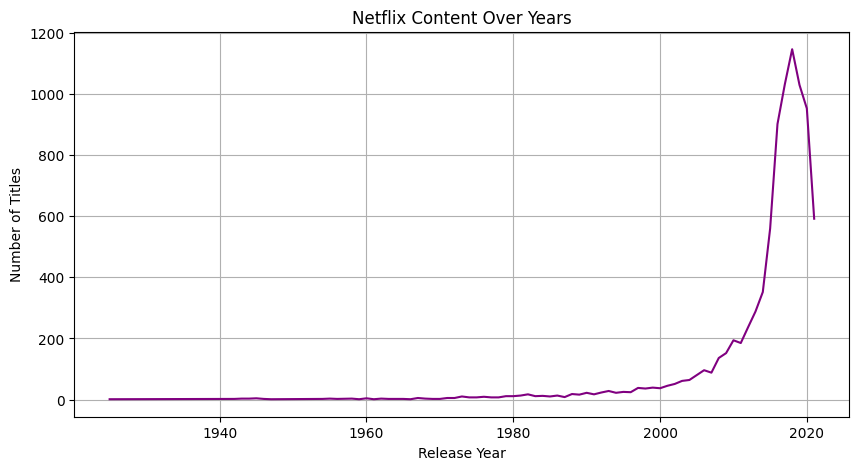

In [16]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,5), color='purple')
plt.title('Netflix Content Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


- Netflix’s content library saw a **massive increase after 2015**, peaking around 2019–2020.
- This aligns with the global **streaming boom** and Netflix’s aggressive content acquisition strategy

Popular Genres

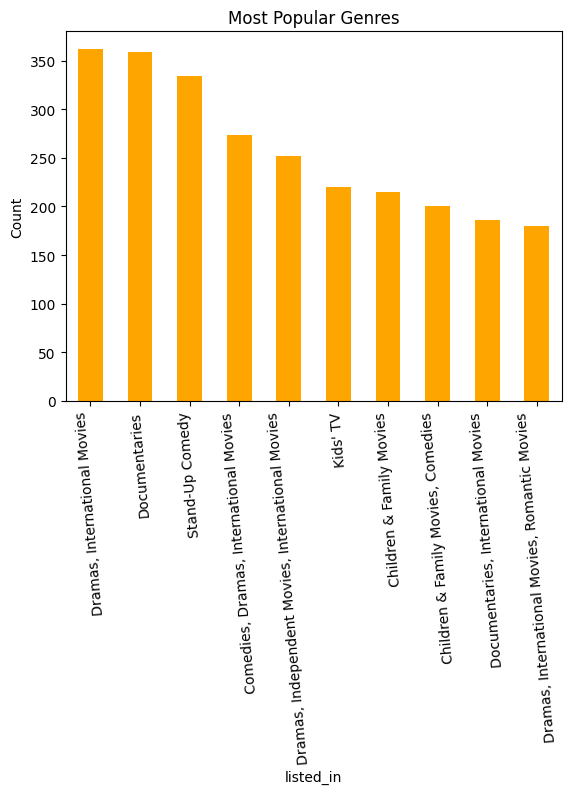

In [19]:
df['listed_in'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Most Popular Genres')
plt.ylabel('Count')
plt.xticks(rotation=95)
plt.show()


- **Dramas**, **International TV Shows**, and **Comedies** are the most common genres.
- Genres like **Documentaries** and **Romantic TV Shows** also have a strong presence.
- This highlights Netflix’s focus on emotionally engaging and globally accessible content.

Top 10 Years by Content Release

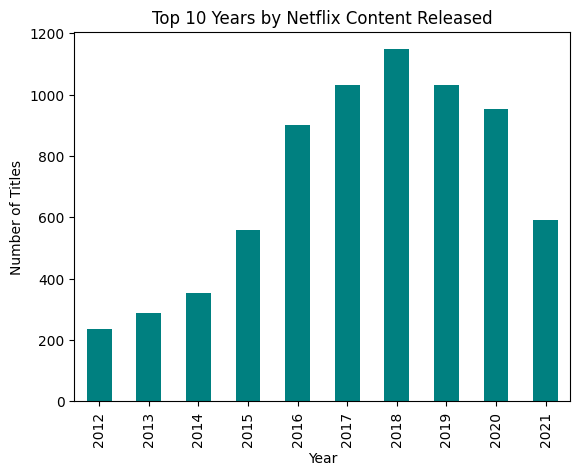

In [20]:
top_years = df['release_year'].value_counts().head(10).sort_index()
top_years.plot(kind='bar', color='teal')
plt.title('Top 10 Years by Netflix Content Released')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


Netflix released the most content in 2019 and 2020 — peaking during the streaming boom

Content Distribution by Country (Pie Chart)

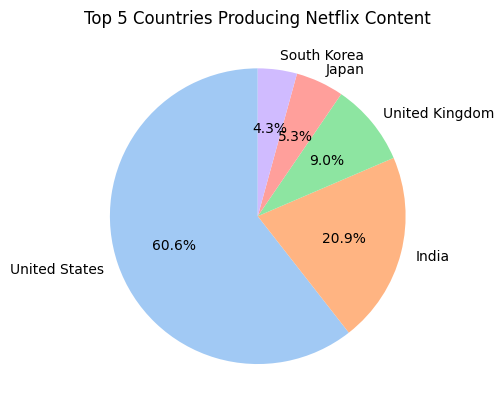

In [21]:
country_counts = df['country'].value_counts().head(5)
country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 5 Countries Producing Netflix Content')
plt.ylabel('')
plt.show()


The USA alone accounts for nearly 40% of Netflix content, followed by India and the UK.

Most Common Ratings

/tmp/ipython-input-22-710815763.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().head(10).index, palette='coolwarm')


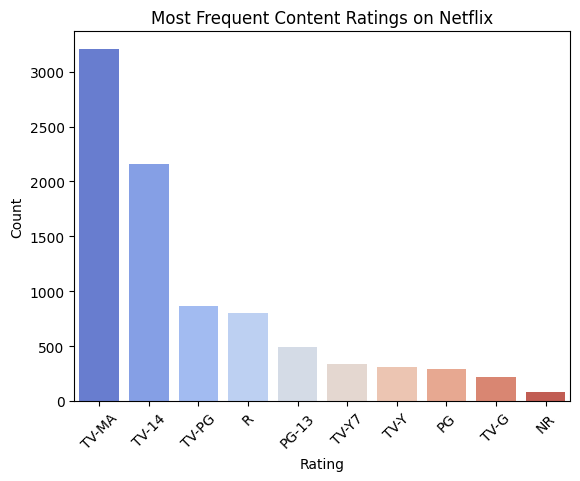

In [22]:
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().head(10).index, palette='coolwarm')
plt.title('Most Frequent Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


TV-MA dominates, showing a focus on mature content. TV-14 and PG follow

Most Frequent Directors on Netflix

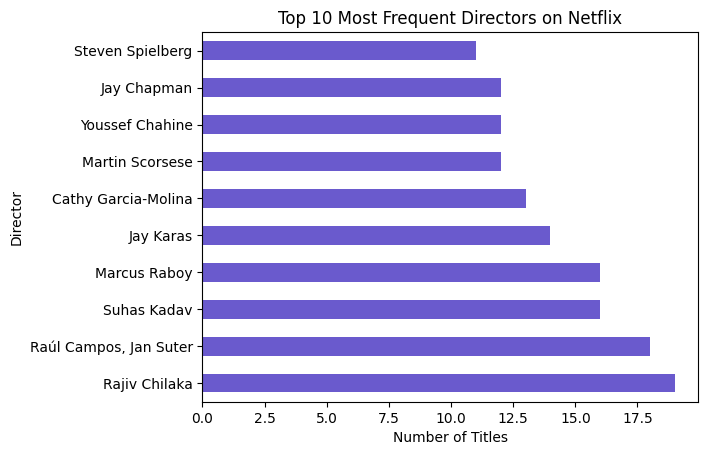

In [23]:
df['director'].value_counts().drop('Unknown').head(10).plot(kind='barh', color='slateblue')
plt.title('Top 10 Most Frequent Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


Director "Raúl Campos" appears frequently — likely due to recurring show series or comedy specials.

Monthly Additions Over Time

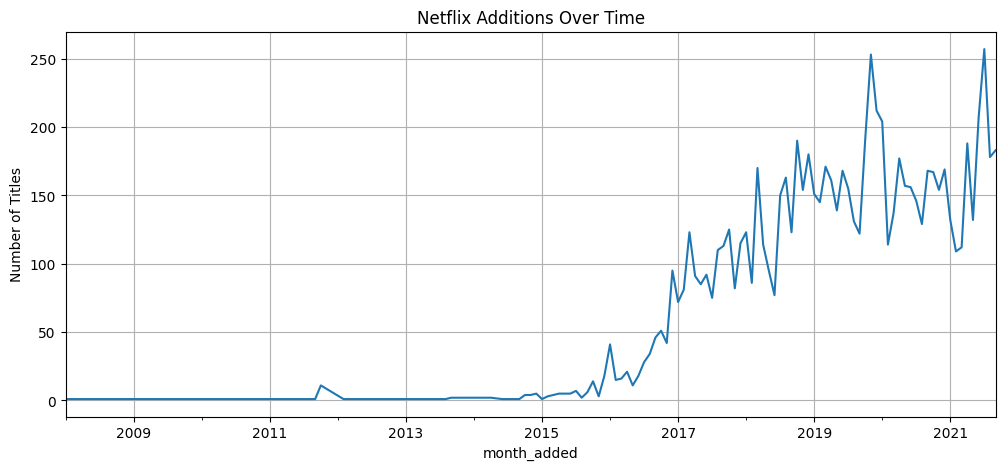

In [24]:
df['month_added'] = df['date_added'].dt.to_period('M')
monthly_add = df.groupby('month_added').size()

monthly_add.plot(figsize=(12,5), title='Netflix Additions Over Time')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


You can observe spikes in December and April – common content release months

Dashboard

/tmp/ipython-input-25-2912103590.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', ax=axs[0], palette='Set2')


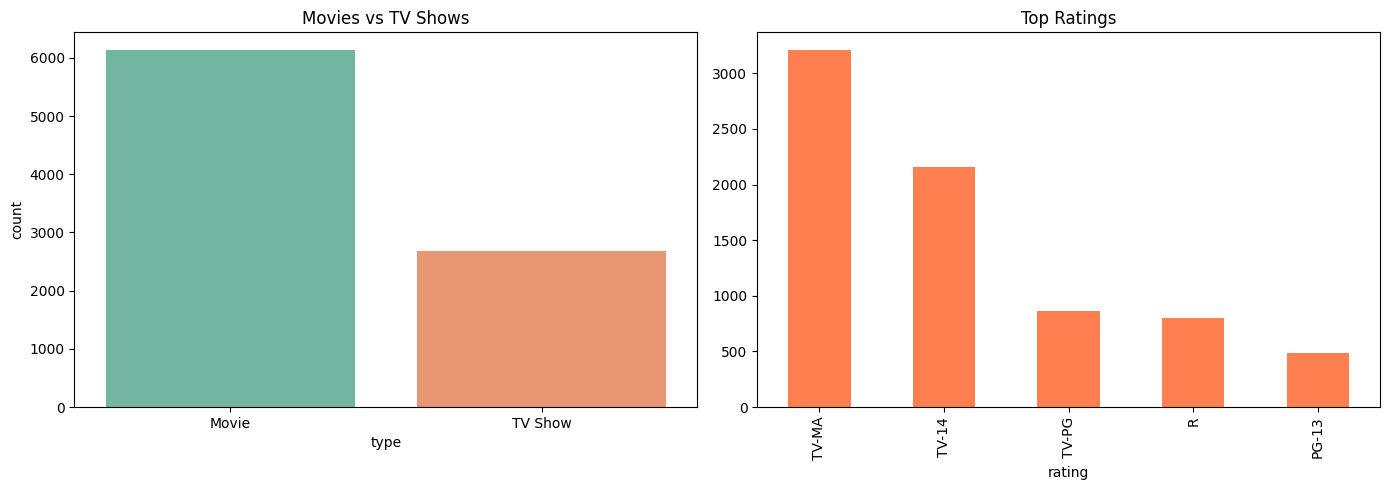

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='type', ax=axs[0], palette='Set2')
axs[0].set_title('Movies vs TV Shows')

df['rating'].value_counts().head(5).plot(kind='bar', ax=axs[1], color='coral')
axs[1].set_title('Top Ratings')

plt.tight_layout()
plt.show()
